In [3]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [4]:
gdf = gpd.read_file('../data/districts.geojson')

In [5]:
gdf.head()

,id,@id,admin_level,barrier,boundary,bus,button_operated,crossing,crossing:island,cycleway:left,...,surface,@relations,tactile_paving,traffic_signals:sound,traffic_signals:vibration,train,type,wikidata,wikipedia,geometry
0,relation/1279932,relation/1279932,9,None,administrative,None,None,None,None,None,...,None,None,None,None,None,None,boundary,Q1547453,None,"POLYGON ((10.92825 59.97974, 10.92800 59.98014..."
1,relation/1279933,relation/1279933,9,None,administrative,None,None,None,None,None,...,None,None,None,None,None,None,boundary,Q1469545,None,"POLYGON ((10.72877 59.92720, 10.72852 59.92752..."
2,relation/1279934,relation/1279934,9,None,administrative,None,None,None,None,None,...,None,None,None,None,None,None,boundary,Q666070,None,"POLYGON ((10.80425 59.94781, 10.80337 59.94772..."
3,relation/1279935,relation/1279935,9,None,administrative,None,None,None,None,None,...,None,None,None,None,None,None,boundary,Q1017795,nn:Bydel Nordre Aker,"POLYGON ((10.71421 59.93542, 10.71428 59.93544..."
4,relation/1279936,relation/1279936,9,None,administrative,None,None,None,None,None,...,None,None,None,None,None,None,boundary,Q606860,no:Bydel Vestre Aker,"POLYGON ((10.61920 59.96869, 10.62052 59.96634..."


In [6]:
gdf.columns

Index(['id', '@id', 'admin_level', 'barrier', 'boundary', 'bus',
       'button_operated', 'crossing', 'crossing:island', 'cycleway:left',
       'ele', 'highway', 'kerb', 'maritime', 'name', 'name:de', 'natural',
       'network', 'public_transport', 'railway', 'railway:position', 'ref',
       'source', 'surface', '@relations', 'tactile_paving',
       'traffic_signals:sound', 'traffic_signals:vibration', 'train', 'type',
       'wikidata', 'wikipedia', 'geometry'],
      dtype='object')

In [7]:
gdf.name

0          Grorud
1         Frogner
2          Bjerke
3     Nordre Aker
4     Vestre Aker
         ...     
76           None
77           None
78           None
79           None
80           None
Name: name, Length: 81, dtype: object

In [8]:
gdf.dropna(subset=['name'], inplace=True)

In [9]:
gdf.name

0                Grorud
1               Frogner
2                Bjerke
3           Nordre Aker
4           Vestre Aker
5            Gamle Oslo
6                  Alna
7                Sagene
8                Ullern
9           Grünerløkka
10    Søndre Nordstrand
11           Nordstrand
12              Sentrum
13                Marka
14       St. Hanshaugen
15             Østensjø
16              Stovner
58     Skinnskattberget
68          Tøyenparken
70           Haugenstua
Name: name, dtype: object

In [10]:
gdf = gdf[['name','geometry']]
gdf

,name,geometry
0,Grorud,"POLYGON ((10.92825 59.97974, 10.92800 59.98014..."
1,Frogner,"POLYGON ((10.72877 59.92720, 10.72852 59.92752..."
2,Bjerke,"POLYGON ((10.80425 59.94781, 10.80337 59.94772..."
3,Nordre Aker,"POLYGON ((10.71421 59.93542, 10.71428 59.93544..."
4,Vestre Aker,"POLYGON ((10.61920 59.96869, 10.62052 59.96634..."
5,Gamle Oslo,"POLYGON ((10.75354 59.90449, 10.75346 59.90437..."
6,Alna,"POLYGON ((10.85814 59.94015, 10.85772 59.94007..."
7,Sagene,"POLYGON ((10.74973 59.92817, 10.74986 59.92815..."
8,Ullern,"POLYGON ((10.67523 59.91823, 10.67536 59.91854..."
9,Grünerløkka,"POLYGON ((10.75317 59.91448, 10.75672 59.91372..."


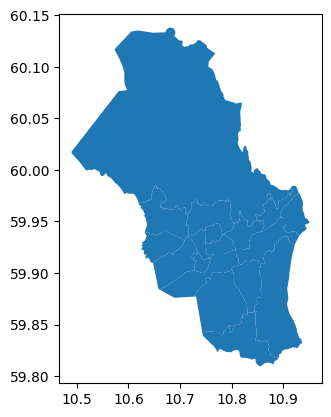

In [11]:
gdf.plot()
plt.show()

In [12]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd

coordinates = pd.read_csv('../data/coordinates.csv')

geometry = [Point(xy) for xy in zip(coordinates.lon, coordinates.lat)]
gdf_coordinates = gpd.GeoDataFrame(coordinates, geometry=geometry, crs='EPSG:4326')

gdf_coordinates = gdf_coordinates.to_crs('EPSG:32633')

polygons = gdf.to_crs('EPSG:32633')

points_in_polygons = gpd.sjoin(gdf_coordinates, polygons, op='within')

count = points_in_polygons.groupby('name')['geometry'].count()
count_df = count.reset_index(name='count')
count_df

merged_df = polygons.merge(count_df, on='name')
merged_df

/home/janos/Documents/ITU/II_semester/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3382: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,name,geometry,count
0,Frogner,"POLYGON ((261347.747 6651007.379, 261335.957 6...",49
1,Bjerke,"POLYGON ((265706.572 6653029.711, 265657.108 6...",1
2,Nordre Aker,"POLYGON ((260594.240 6651973.845, 260597.869 6...",14
3,Vestre Aker,"POLYGON ((255537.191 6656021.357, 255593.358 6...",6
4,Gamle Oslo,"POLYGON ((262568.341 6648392.784, 262562.758 6...",30
5,Sagene,"POLYGON ((262524.600 6651039.594, 262531.460 6...",21
6,Ullern,"POLYGON ((258293.571 6650203.687, 258303.359 6...",9
7,Grünerløkka,"POLYGON ((262618.770 6649504.877, 262811.861 6...",50
8,Sentrum,"POLYGON ((261664.750 6650191.125, 261630.638 6...",42
9,St. Hanshaugen,"POLYGON ((261664.750 6650191.125, 261671.149 6...",40


In [13]:
merged_df.to_file('../data/districts.shp', driver='ESRI Shapefile')

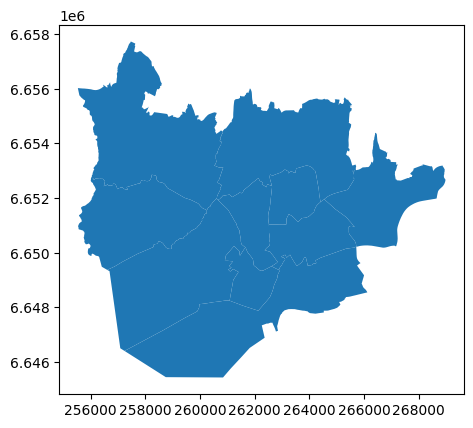

In [14]:
merged_df.crs = 'EPSG:25832'
merged_df.plot()
plt.show()

In [15]:
polygons

,name,geometry
0,Grorud,"POLYGON ((272843.708 6656147.840, 272832.579 6..."
1,Frogner,"POLYGON ((261347.747 6651007.379, 261335.957 6..."
2,Bjerke,"POLYGON ((265706.572 6653029.711, 265657.108 6..."
3,Nordre Aker,"POLYGON ((260594.240 6651973.845, 260597.869 6..."
4,Vestre Aker,"POLYGON ((255537.191 6656021.357, 255593.358 6..."
5,Gamle Oslo,"POLYGON ((262568.341 6648392.784, 262562.758 6..."
6,Alna,"POLYGON ((268660.138 6651987.129, 268636.058 6..."
7,Sagene,"POLYGON ((262524.600 6651039.594, 262531.460 6..."
8,Ullern,"POLYGON ((258293.571 6650203.687, 258303.359 6..."
9,Grünerløkka,"POLYGON ((262618.770 6649504.877, 262811.861 6..."


In [16]:
count_df

,name,count
0,Bjerke,1
1,Frogner,49
2,Gamle Oslo,30
3,Grünerløkka,50
4,Nordre Aker,14
5,Sagene,21
6,Sentrum,42
7,St. Hanshaugen,40
8,Ullern,9
9,Vestre Aker,6


In [17]:
merged = pd.merge(polygons, count_df, on='name', how='outer', indicator=True)
result = merged[merged['_merge'] == 'left_only']['name']
merged_df2 = polygons.merge(result, on='name')
merged_df2

,name,geometry
0,Grorud,"POLYGON ((272843.708 6656147.840, 272832.579 6..."
1,Alna,"POLYGON ((268660.138 6651987.129, 268636.058 6..."
2,Søndre Nordstrand,"POLYGON ((266562.448 6638364.321, 266568.689 6..."
3,Nordstrand,"POLYGON ((262452.000 6647411.619, 262263.448 6..."
4,Marka,"MULTIPOLYGON (((265706.572 6653029.711, 265707..."
5,Østensjø,"POLYGON ((268272.919 6648563.470, 268272.561 6..."
6,Stovner,"POLYGON ((272862.772 6651456.477, 272869.769 6..."
7,Skinnskattberget,POINT (260144.584 6674128.736)
8,Tøyenparken,POINT (263899.469 6649730.684)
9,Haugenstua,POINT (271532.066 6653080.485)


In [18]:
merged_df2 = merged_df2.drop(merged_df2.index[[7, 8, 9]])
merged_df2['count'] = 0

In [19]:
merged_df = merged_df.to_crs(merged_df2.crs)

In [20]:
final = pd.concat([merged_df, merged_df2], axis=0)

In [21]:
type(final)

geopandas.geodataframe.GeoDataFrame

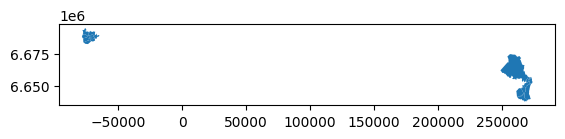

In [22]:
final.crs = 'EPSG:25832'
final.plot()
plt.show()

In [23]:
final.to_file('../data/all_districts.shp', driver='ESRI Shapefile')